# Risk Parity Model

In [347]:
# Import modules.
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
import sqlalchemy as sql
from pathlib import Path
warnings.filterwarnings('ignore')

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
today = date.today()
start_date = today - datetime.timedelta(days=252*5) #trading days(252) * amount of years to go back 

start = start_date.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "AAPL", "MSFT", "NVDA", "AMZN", "BRK-B",
         "GOOG", "META", "UNH", "XOM", "AGG", "BND", "LQD", "VCIT", "BNDX", "TMF", "TLT", "ICVT", "LKOR", "FBND"]
assets.sort()

# Downloading data
og_data = yf.download(assets, start = start, end = end)
data = og_data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  30 of 30 completed


'2019-11-21'

'2023-05-04'

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-22,-0.0878%,0.0532%,0.6347%,0.0594%,0.1377%,0.6140%,0.0387%,-0.4618%,0.0661%,0.3499%,...,-0.3332%,0.7407%,0.5169%,-0.1269%,-0.1629%,-0.5738%,0.0317%,0.3575%,0.6863%,-0.4306%
2019-11-25,1.7534%,0.0974%,1.6108%,0.0950%,0.0172%,0.5047%,0.0967%,0.8762%,0.8584%,0.6401%,...,0.1003%,0.6350%,0.7224%,1.4551%,0.1142%,0.0787%,-0.3333%,1.1704%,0.8811%,-0.6631%
2019-11-26,-0.7809%,0.1416%,1.3023%,0.1661%,0.1375%,-0.0730%,0.1414%,0.5250%,0.3028%,0.4206%,...,-0.9183%,-0.0996%,0.2918%,0.0911%,0.8147%,1.3893%,0.3345%,-0.0805%,0.6839%,-0.2467%
2019-11-27,1.3432%,-0.1237%,1.2004%,-0.1540%,0.0000%,0.7309%,-0.0387%,-0.0426%,0.3508%,0.0292%,...,0.2528%,0.3990%,-0.0970%,0.5573%,0.2424%,0.3102%,0.1746%,0.5134%,0.8592%,-0.0582%
2019-11-29,-0.2203%,-0.1239%,-0.9739%,0.0000%,-0.1716%,-0.0907%,0.0000%,-0.6116%,-0.2927%,-0.3449%,...,-1.0086%,-0.1656%,-0.4610%,-0.2940%,-0.0323%,-0.3866%,-0.0951%,-0.3506%,-0.6491%,-0.8297%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-27,2.8395%,-0.3607%,4.6104%,-0.4325%,-0.2465%,1.7783%,-0.3473%,3.7530%,0.2531%,-0.4239%,...,0.3592%,1.6119%,1.9769%,2.1217%,1.1158%,2.4149%,1.2013%,0.5239%,2.6376%,1.1953%
2023-04-28,0.7541%,0.5128%,-3.9792%,0.5565%,0.8031%,0.7111%,0.5228%,-0.1384%,0.0982%,1.1200%,...,1.5508%,1.1897%,0.9693%,1.0857%,0.5323%,1.1522%,-0.1448%,0.8535%,0.2577%,1.2925%
2023-05-01,-0.0530%,-1.0240%,-3.2243%,-1.0284%,-0.4501%,0.4931%,-0.9751%,-0.4713%,0.0435%,-2.5654%,...,-1.1277%,-0.2713%,0.5400%,0.0597%,0.0775%,-0.9271%,0.1740%,0.5167%,-0.9874%,-3.1012%


In [365]:
x = float(input())

if (x >= 0) and (x < 0.25):
    fear_factor = 10000
    print(fear_factor)

elif (x >= 0.25) and (x < 0.5):
        fear_factor = 3500
        print(fear_factor)

elif (x >= 0.5) and (x <= 0.75):
        fear_factor = 2.5
        print(fear_factor)
else:
    if (x >= 0.75) and (x <= 1):
        fear_factor = 0
        print(fear_factor)
    else:
        print(f"Number isn't between 0 and 1")

0.6
2.5


In [366]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = fear_factor # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,13.7384%,0.0005%,0.0000%,0.0004%,0.0002%,0.0000%,0.0002%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0001%,0.0000%,0.0000%,0.0000%,0.0000%,20.7873%


In [367]:
print(fear_factor)

2.5


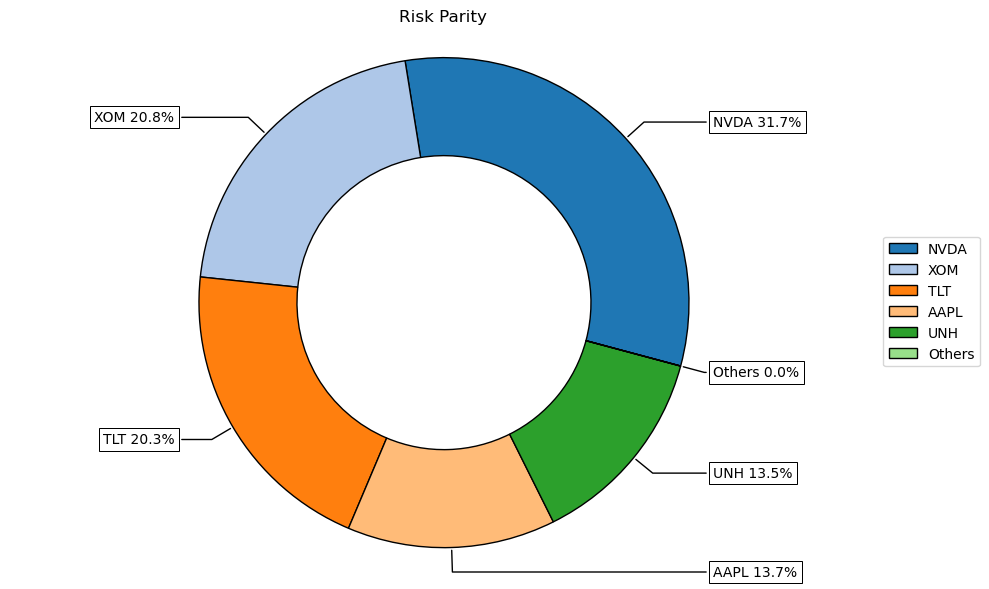

In [368]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Risk Parity', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

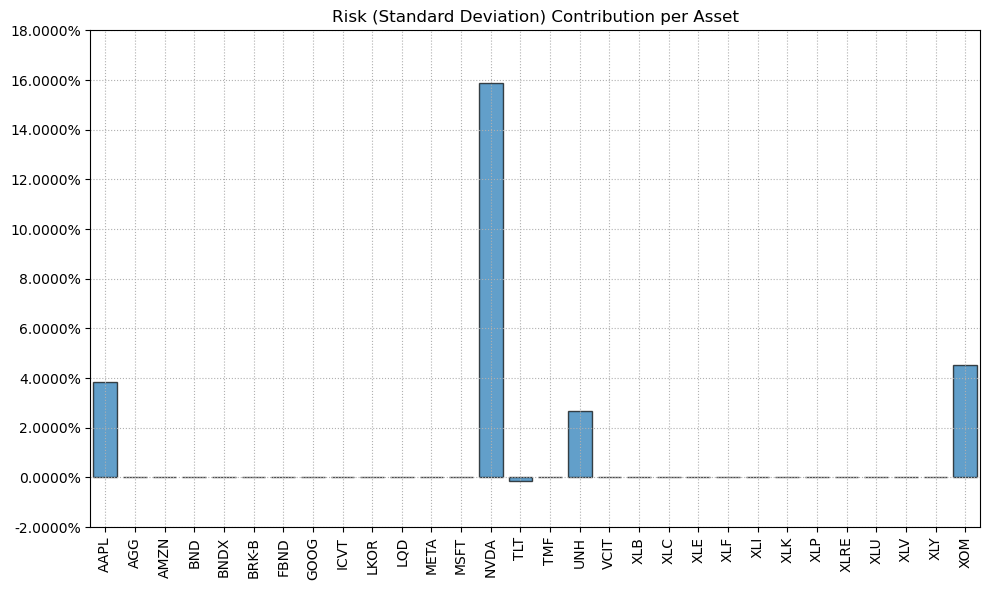

In [369]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

In [370]:
w.to_csv(Path("w.csv"))

('^TNX', 'TIP', 'NHRMX')